In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#Données
r1=[3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6, 5, 15, 4, 9, 9,
 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 8, 11, 5, 12, 8, 17, 9, 3, 2,
 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14,
 16, 17, 8, 8, 9, 5, 9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9,
 4, 4, 9, 9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 7,
 5, 7, 6, 3, 7]

n1=[28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52,
 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31,
 42, 46, 47, 55, 63, 91, 43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40,
 27, 48, 43, 61, 77, 55, 60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28,
 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63,
 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 51, 55, 41,
 53, 51, 42, 46, 54, 32]

r0=[0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 4, 1, 4, 5, 2,
 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 5, 6, 6, 10, 7, 5, 5, 2, 8,
 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5,
 10, 3, 2, 1, 7, 9, 13, 9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7,
 7, 4, 2, 3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1]

n0=[28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52,
 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31,
 42, 46, 47, 55, 63, 91, 43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40,
 27, 48, 43, 61, 77, 55, 60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28,
 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63,
 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 51, 55, 41,
 53, 51, 42, 46, 54, 32]

year=[-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, -5, -5, -5,
 -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -2,
 -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10]

In [3]:
#Fonctions utiles:
def sigm(x): #Fonction sigmoïde
    return 1/(1+np.exp(-x))
def p0(mu):
    return sigm(mu)
def p1(mu,alpha,beta1,beta2,b,year):
    return sigm(mu+alpha+beta1*year+beta2*(year**2-22)+b)

def R1(alpha,beta1,beta2,mu,b): 
    r=0 #vraisemblance r1
    for i in range(K):
        r+=r1[i]*np.log(p1(mu[i],alpha,beta1,beta2,b[i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(mu[i],alpha,beta1,beta2,b[i],year[i]))
    return r

def R0(alpha,beta1,beta2,mu,b):
    r=0 #vraisemblance r0
    for i in range(K):
        r+=r0[i]*np.log(p0(mu[i]))+(n0[i]-r0[i])*np.log(1-p0(mu[i]))
    return r
    
n=10000 #Nombre d'itérations de l'échantilloneur
K=120 #Nombre de "strates"

#Echantilloneur:
def GibbsSampler(n,std_dev,alpha,beta1,beta2,sigma,mu,b):
    X=np.zeros((n+1,4)) #Alpha,Beta1,Beta2 et sigma
    Xmu=np.zeros((n+1,K))
    Xb=np.zeros((n+1,K))
    #Initialisation
    X[0]=[alpha,beta1,beta2,sigma]
    Xmu[0]=mu
    Xb[0]=b
    for j in range(n):
        #Mise à jour alpha
        X[j+1]=X[j]
        Xp=X[j+1][0]+std_dev[0]*np.random.normal() #proposition alpha
        top0=-Xp**2/2000000 #loi a priori
        top1=R1(Xp,X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1])
        top=top0+top1
        bottom0=-X[j+1][0]**2/2000000 #loi a priori
        bottom1=R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1]) #vraisemblance
        bottom=bottom0+bottom1
        prob=np.exp(top-bottom)
        if np.random.uniform()<prob:
            X[j+1][0]=Xp
            
        #Mise à jour beta1
        Xp=X[j+1][1]+std_dev[1]*np.random.normal() #proposition beta1
        top0=-Xp**2/2000000 #loi a priori
        top1=R1(X[j+1][0],Xp,X[j+1][2],Xmu[j+1],Xb[j+1])
        top=top0+top1
        bottom0=-X[j+1][1]**2/2000000 #loi a priori
        bottom1=R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1]) #vraisemblance
        bottom=bottom0+bottom1
        prob=np.exp(top-bottom)
        if np.random.uniform()<prob:
            X[j+1][1]=Xp
            
        #Mise à jour beta2
        Xp=X[j+1][2]+std_dev[2]*np.random.normal() #proposition beta2
        top0=-Xp**2/2000000 #loi a priori
        top1=R1(X[j+1][0],X[j+1][1],Xp,Xmu[j+1],Xb[j+1])
        top=top0+top1
        bottom0=-X[j+1][2]**2/2000000 #loi a priori
        bottom1=R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1]) #vraisemblance
        bottom=bottom0+bottom1
        prob=np.exp(top-bottom)
        if np.random.uniform()<prob:
            X[j+1][2]=Xp
        
        #Mise à jour sigma
        Xp=X[j+1][3]*np.random.lognormal() #proposition sigma: marche aléatoire lognormale
        top=-2.002*np.log(Xp)-0.001/Xp**2-np.sum(np.array(b)**2)/(2*Xp**2)
        bottom=-2.002*np.log(X[j+1][3])-0.001/X[j+1][3]**2-np.sum(np.array(b)**2)/(2*X[j+1][3]**2)
        prob=np.exp(top-bottom)*Xp/X[j+1][3]
        if np.random.uniform()<prob:
            X[j+1][3]=Xp
        
        #Mise à jour mu
        Xmu[j+1]=Xmu[j]
        for i in range(K):
            Xp=Xmu[j+1][i]+std_dev[4]*np.random.normal() #proposition mu
            top0=-Xp**2*X[j+1][3]/2 #loi a priori mu
            top1=r1[i]*np.log(p1(Xp,X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xp,X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
            top1+=r0[i]*np.log(p0(Xp))+(n0[i]-r0[i])*np.log(1-p0(Xp))
            top=top0+top1
            bottom0=-Xmu[j+1][i]**2*X[j+1][3] #loi a priori
            bottom1=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
            bottom1+=r0[i]*np.log(p0(Xmu[j+1][i]))+(n0[i]-r0[i])*np.log(1-p0(Xmu[j+1][i]))
            bottom=bottom0+bottom1
            prob=np.exp(top-bottom)
            if np.random.uniform()<prob:
                Xmu[j+1][i]=Xp
        
        #Mise à jour b
        Xb[j+1]=Xb[j]
        for i in range(K):
            Xp=Xb[j+1][i]+std_dev[5]*np.random.normal() #propoisition b
            top0=-Xp**2/2000 #loi a priori b
            top1=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xp,year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xp,year[i]))
            top=top0+top1
            bottom0=-Xb[j+1][i]**2/2000 #loi a priori 
            bottom1=r1[i]*np.log(p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(Xmu[j+1][i],X[j+1][0],X[j+1][1],X[j+1][2],Xb[j+1][i],year[i]))
            bottom=bottom0+bottom1
            prob=np.exp(top-bottom)
            if np.random.uniform()<prob:
                Xb[j+1][i]=Xp
    return X,Xmu,Xb


In [4]:
std_dev=[0.1,0.01,0.003,0.1,1,1] #Variance des propositions (ajustées)

#Valeurs initiales (ajustées):
alpha=-1.7
beta1=0
beta2=0
mu=[0]*K
b=[0]*K
sigma=0.1
n=5000
t0=time.time()
X,Xmu,Xb=GibbsSampler(n,std_dev,alpha,beta1,beta2,sigma,mu,b)
print(f"temps d'éxécution pour n={n}: {time.time()-t0} s.")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: RuntimeWarning: overflow encountered in exp


temps d'éxécution pour n=5000: 117.2921233177185 s.


In [5]:
Xb=Xb.transpose()
X=np.transpose(X)
Xmu=Xmu.transpose()

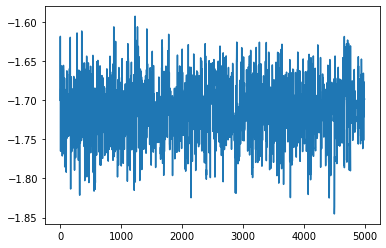

In [24]:
plt.plot(X[0])
#plt.title("Chaîne de alpha");

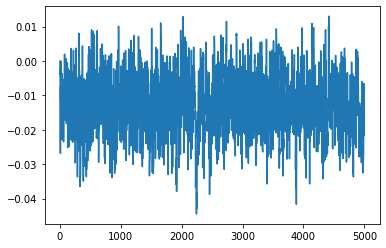

In [25]:
plt.plot(X[1])
#plt.title("Chaîne de beta0");

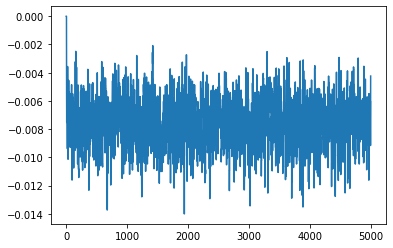

In [26]:
plt.plot(X[2])
#plt.title("Chaîne de beta1");

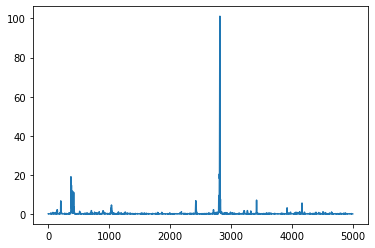

In [27]:
plt.plot(X[3])
#plt.title("Chaîne de sigma");

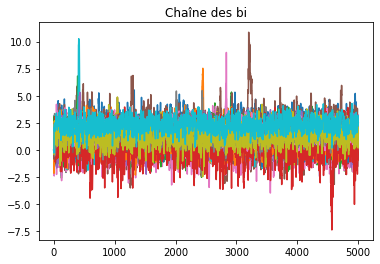

In [10]:
for i in range(120):
    plt.plot(Xb[i])
plt.title("Chaîne des bi");

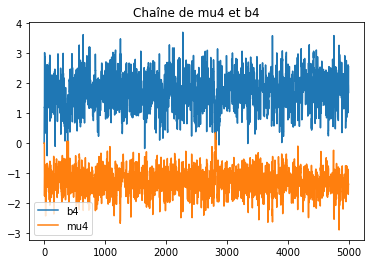

In [11]:
plt.plot(Xb[4],label="b4")
plt.plot(Xmu[4],label='mu4')
plt.legend();
plt.title("Chaîne de mu4 et b4");

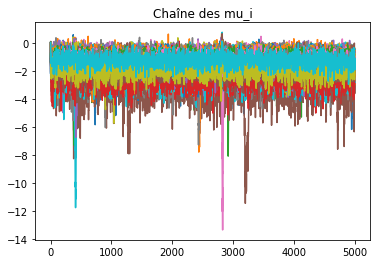

In [12]:
for i in range(120):
    plt.plot(Xmu[i])
plt.title("Chaîne des mu_i");

In [13]:
print("Moyennes a posteriori: ")
print(f"alpha: {np.mean(X[0])}")
print(f"beta0: {np.mean(X[1])}")
print(f"beta1: {np.mean(X[2])}")
print(f"sigma: {np.mean(X[3])}")
print("Variances a posteriori: ")
print(f"alpha: {np.sqrt(np.var(X[0]))}")
print(f"beta0: {np.sqrt(np.var(X[1]))}")
print(f"beta1: {np.sqrt(np.var(X[2]))}")
print(f"sigma²: {(np.var(X[3]))}")

Moyennes a posteriori: 
alpha: -1.712969306515448
beta0: -0.013062623244482636
beta1: -0.00762997363395258
sigma: 0.3769329195839585
Variances a posteriori: 
alpha: 0.03677469318924911
beta0: 0.009017372286827639
beta1: 0.0018361078475063815
sigma²: 10.932336900212926


In [14]:
for i in range(120):
    print("proba réelle: ",r1[i]/n1[i])
    print("proba modèle (moyenne a posteriori: ): ",sigm(np.mean(X[0])+np.mean(Xmu[i])+np.mean(X[1])*year[i]+np.mean(X[2])*(year[i]**2-22)+np.mean(Xb[i])))

proba réelle:  0.10714285714285714
proba modèle (moyenne a posteriori: ):  0.09184002846049481
proba réelle:  0.23809523809523808
proba modèle (moyenne a posteriori: ):  0.22066061276034707
proba réelle:  0.0625
proba modèle (moyenne a posteriori: ):  0.04706856452835111
proba réelle:  0.2
proba modèle (moyenne a posteriori: ):  0.1908035675945131
proba réelle:  0.2
proba modèle (moyenne a posteriori: ):  0.18640618553423474
proba réelle:  0.05263157894736842
proba modèle (moyenne a posteriori: ):  0.04112421284284017
proba réelle:  0.16666666666666666
proba modèle (moyenne a posteriori: ):  0.14974013393786276
proba réelle:  0.06976744186046512
proba modèle (moyenne a posteriori: ):  0.05491829693277782
proba réelle:  0.10204081632653061
proba modèle (moyenne a posteriori: ):  0.09372788424253437
proba réelle:  0.20754716981132076
proba modèle (moyenne a posteriori: ):  0.1990620724424733
proba réelle:  0.1935483870967742
proba modèle (moyenne a posteriori: ):  0.1831657323379128
prob

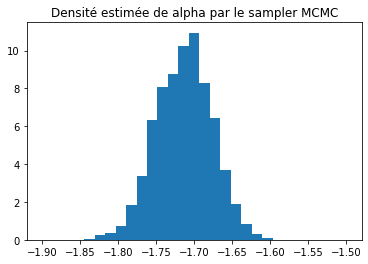

In [15]:
plt.hist(X[0],np.linspace(-1.9,-1.5,30),density=True);
plt.title("Densité estimée de alpha par le sampler MCMC");